Import Data

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/LOMBA MS fixx.csv')
data

,no,Tgl_Iklan,url,harga_juta,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
0,1,6/5/2021,https://www.rumah123.com/properti/makassar/hos...,748,Makassar,73,60,3,2,0,0,1,0,2200,SHM,"RUMAH KLASIK HARGA MENARIK, DEKAT BANDARA SULT...",Ini bukan di eropa yahh...\nini Rumah klasik y...
1,2,6/5/2021,https://www.rumah123.com/properti/makassar/hos...,6900,Makassar,350,1125,6,7,1,1,1,1,4400,SHM,Rumah Modern Artistik 4 1/2 Lantai,Rumah Dijual Makassar Water Heater Sentral\n11...
2,3,6/4/2021,https://www.rumah123.com/properti/makassar/hos...,2500,Makassar,180,182,5,4,1,1,2,0,2200,SHM,Hanya 12 Unit Rumah Mewah Lokasi Premium,*Tipe AQUAMARINE*Cluster Blue Aqua Citraland T...
3,4,6/3/2021,https://www.rumah123.com/properti/makassar/hos...,350,Makassar,72,36,2,1,0,0,0,0,1300,SHM,"hunian cantik dan asri,minimalis,bebas riba","Promo Rumah di Jalan Poros, Lokasi Printis Kem..."
4,5,6/3/2021,https://www.rumah123.com/properti/makassar/hos...,1000,Makassar,102,225,3,2,0,0,0,0,2200,SHM,"Rumah siap huni, full perabot, 2,5 lantai, lan...","Rumah Dijual Makassar jual cepat, nego\n\nruma..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,216,8/3/2021,https://www.rumah123.com/properti/makassar/hos...,1000,Makassar,126,112,3,2,0,0,0,0,2200,SHM,Rumah Amaryllis,Rumah Dijual Makassar Dengan Perabot\nDekat Tr...
216,217,8/3/2021,https://www.rumah123.com/properti/makassar/hos...,535,Makassar,72,70,3,2,0,0,0,0,0,SHM,Rumah Minimalis 3 kamar belakang Polda perinti...,Rumah Minimalis 3 kamar belakang Polda perinti...
217,218,8/3/2021,https://www.rumah123.com/properti/makassar/hos...,850,Makassar,95,80,3,2,0,0,1,0,2200,SHM,Rumah mewah minimalis TYPE 80 dekat dari Mall ...,Rumah minimalis Harga Murah Citra Hertasning M...
218,219,8/3/2021,https://www.rumah123.com/properti/makassar/hos...,900,Makassar,120,80,2,2,0,0,1,0,2200,SHM,Rumah Asri Clove,Rumah Dijualsewa Makassar Siap Huni


DATA PREPROCESSING

In [ ]:
p = data['surat']
for i in p:
  if len(i) != 3:
    data['surat'] = data['surat'].replace([i],'Lainnya')
  else:
    continue

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['surat'] = enc.fit_transform(data['surat'].values)
data['carport'] = enc.fit_transform(data['carport'].values)
data['garasi'] = enc.fit_transform(data['garasi'].values)

In [ ]:
atr_data = data.drop(columns = ['harga_juta','no', 'url', 'Tgl_Iklan', 'Kota','judul', 'deskripsi'])
atr_data.head()

,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,73,60,3,2,0,0,1,0,2200,2
1,350,1125,6,7,1,1,1,1,4400,2
2,180,182,5,4,1,1,2,0,2200,2
3,72,36,2,1,0,0,0,0,1300,2
4,102,225,3,2,0,0,0,0,2200,2


In [ ]:
data.describe()

,no,harga_juta,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,110.500000,2658.963636,161.077273,171.631818,3.431818,2.604545,0.281818,0.204545,0.577273,0.127273,2501.818182,1.781818
std,63.652704,5949.568541,137.416869,146.158624,1.810645,1.791144,0.613870,0.436860,0.647039,0.384852,2660.791993,0.594984
min,1.000000,245.000000,44.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.750000,650.000000,90.000000,70.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,2.000000
50%,110.500000,1200.000000,120.000000,120.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,2.000000
75%,165.250000,2929.500000,187.250000,220.250000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,2.000000
max,220.000000,80000.000000,1400.000000,1125.000000,20.000000,20.000000,4.000000,3.000000,3.000000,3.000000,33000.000000,2.000000


In [ ]:
y = data.harga_juta
makassar_features=['LT','LB','listrik']
makassar_features1 = ['LT','LB','KT','KM','KTP','KMP','carport', 'garasi','listrik','surat']
X=data[makassar_features]
p = data[makassar_features1]
print(X.describe())
p.describe()

                LT           LB       listrik
count   220.000000   220.000000    220.000000
mean    161.077273   171.631818   2501.818182
std     137.416869   146.158624   2660.791993
min      44.000000    27.000000      0.000000
25%      90.000000    70.000000   1300.000000
50%     120.000000   120.000000   2200.000000
75%     187.250000   220.250000   2200.000000
max    1400.000000  1125.000000  33000.000000


,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,161.077273,171.631818,3.431818,2.604545,0.281818,0.204545,0.577273,0.127273,2501.818182,1.781818
std,137.416869,146.158624,1.810645,1.791144,0.613870,0.436860,0.647039,0.384852,2660.791993,0.594984
min,44.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,70.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,2.000000
50%,120.000000,120.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,2.000000
75%,187.250000,220.250000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,2.000000
max,1400.000000,1125.000000,20.000000,20.000000,4.000000,3.000000,3.000000,3.000000,33000.000000,2.000000


In [ ]:
X.head()

,LT,LB,listrik
0,73,60,2200
1,350,1125,4400
2,180,182,2200
3,72,36,1300
4,102,225,2200


In [ ]:
p.head()

,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,73,60,3,2,0,0,1,0,2200,2
1,350,1125,6,7,1,1,1,1,4400,2
2,180,182,5,4,1,1,2,0,2200,2
3,72,36,2,1,0,0,0,0,1300,2
4,102,225,3,2,0,0,0,0,2200,2


PREDIKSI HARGA

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error as MSE

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)
makassar_model=DecisionTreeRegressor(max_leaf_nodes=10)
makassar_model.fit(train_X, train_y)

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
result = cross_val_score(makassar_model, X, y, cv=cv)
print("Decision tree result for 3 variables : ",result)

rmse = (np.sqrt(MSE(val_y, makassar_model.predict(val_X))))
print("root mean squared error for 3 variables : ", rmse)

Decision tree result for 3 variables :  [-0.24733686  0.00835945 -1.35397449 -0.03000436 -3.21971479]
root mean squared error for 3 variables :  2657.2069831566755


In [ ]:
train_p, val_p, train_y, val_y = train_test_split(p,y,random_state=0)
makassar_model1=DecisionTreeRegressor(max_leaf_nodes=10)
makassar_model1.fit(train_p, train_y)

cv1 = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
result1 = cross_val_score(makassar_model1, p, y, cv=cv1)
print("Decision tree result for all variables : ",result1)

rmse1 = (np.sqrt(MSE(val_y, makassar_model1.predict(val_p))))
print("root mean squared error for all variables : ", rmse1)

Decision tree result for all variables :  [ 0.06563226  0.43561611 -1.3618765   0.59894494 -3.21563506]
root mean squared error for all variables :  1812.6029485115957


In [ ]:
print('Making prediction for rhe following following 5 houses (all variables) : ')
print(val_p.head())
print('The predictions are: ')
print(makassar_model1.predict(val_p.head()))

Making prediction for rhe following following 5 houses (all variables) : 
      LT   LB  KT  KM  KTP  KMP  carport  garasi  listrik  surat
152  105  200   3   3    0    0        0       0     2200      2
74   120  122   3   3    0    0        0       0     2200      0
71   126  107   3   3    1    1        2       0     2200      2
161   55   55   2   2    0    0        0       1     2200      1
162   86   45   2   1    0    0        0       0      900      2
The predictions are: 
[2844.06976744 2844.06976744 2844.06976744  887.43820225  887.43820225]


In [ ]:
print('Making prediction for the following following 5 houses (3 variables) : ')
print(val_X.head())
print('The predictions are: ')
print(makassar_model.predict(val_X.head()))

Making prediction for the following following 5 houses (3 variables) : 
      LT   LB  listrik
152  105  200     2200
74   120  122     2200
71   126  107     2200
161   55   55     2200
162   86   45      900
The predictions are: 
[ 2763.12195122 12200.           909.19512195   909.19512195
   909.19512195]


In [ ]:
example={'LT':[102],'LB':[225],'KT':[3], 'KM':[2],'KTP':[0],'KMP':[0],'carport':[0],'garasi':[0],'listrik':[2200],'surat':[2]}
new_input_df=pd.DataFrame(example)
new_input_df
print('The predictions are')
print(makassar_model1.predict(new_input_df))

The predictions are
[887.43820225]


In [ ]:
val_predictions1=makassar_model1.predict(val_p)
print(mean_absolute_error(val_y, val_predictions1))

1207.994178524202


In [ ]:
val_predictions=makassar_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

1448.9002735960378


VISUALISASI

In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image

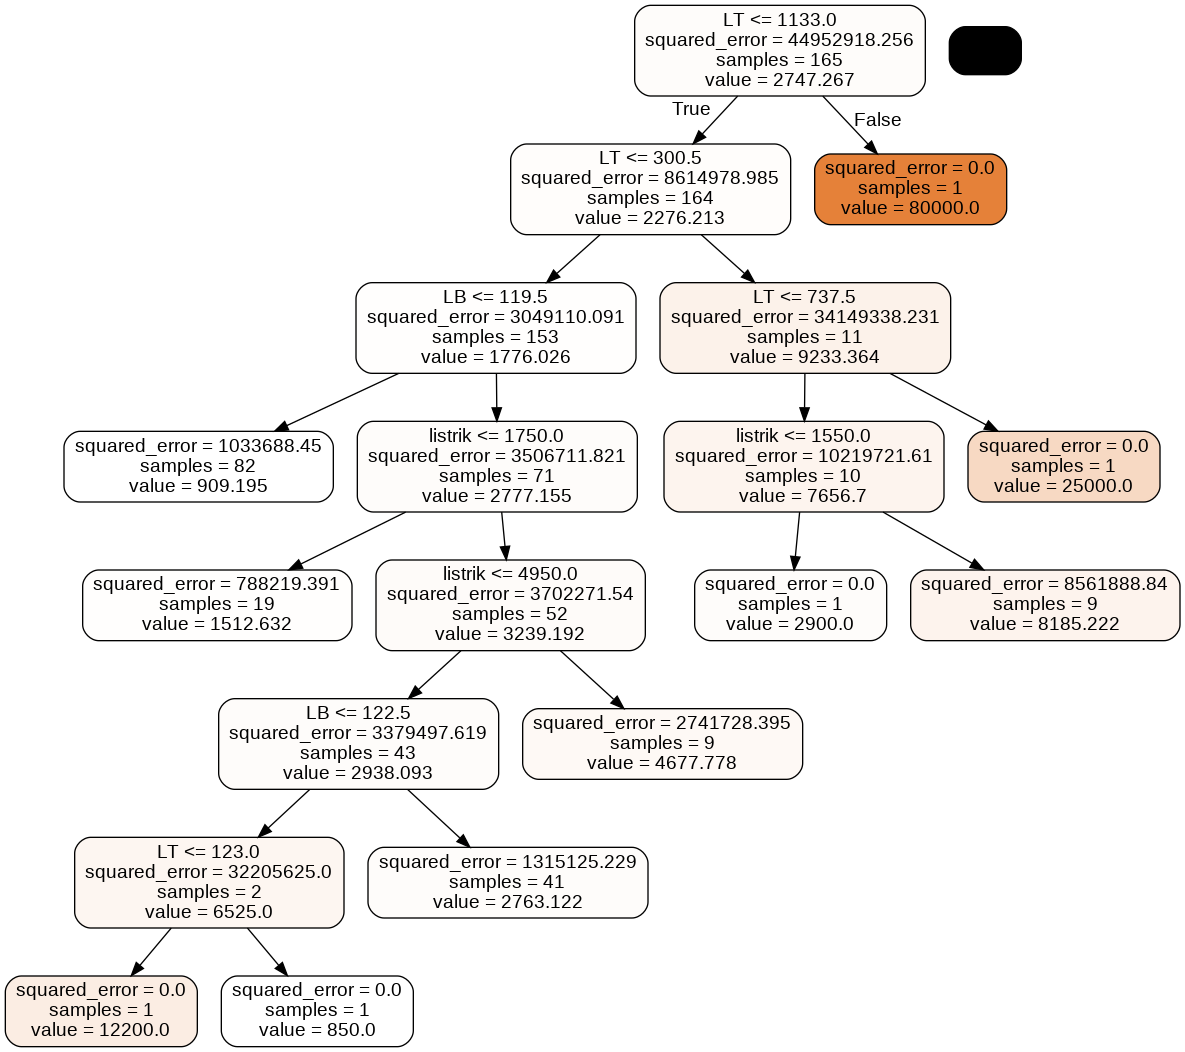

In [ ]:
dot_data=tree.export_graphviz(makassar_model, out_file=None, feature_names = makassar_features, class_names = val_predictions, rounded = True, filled = True)
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

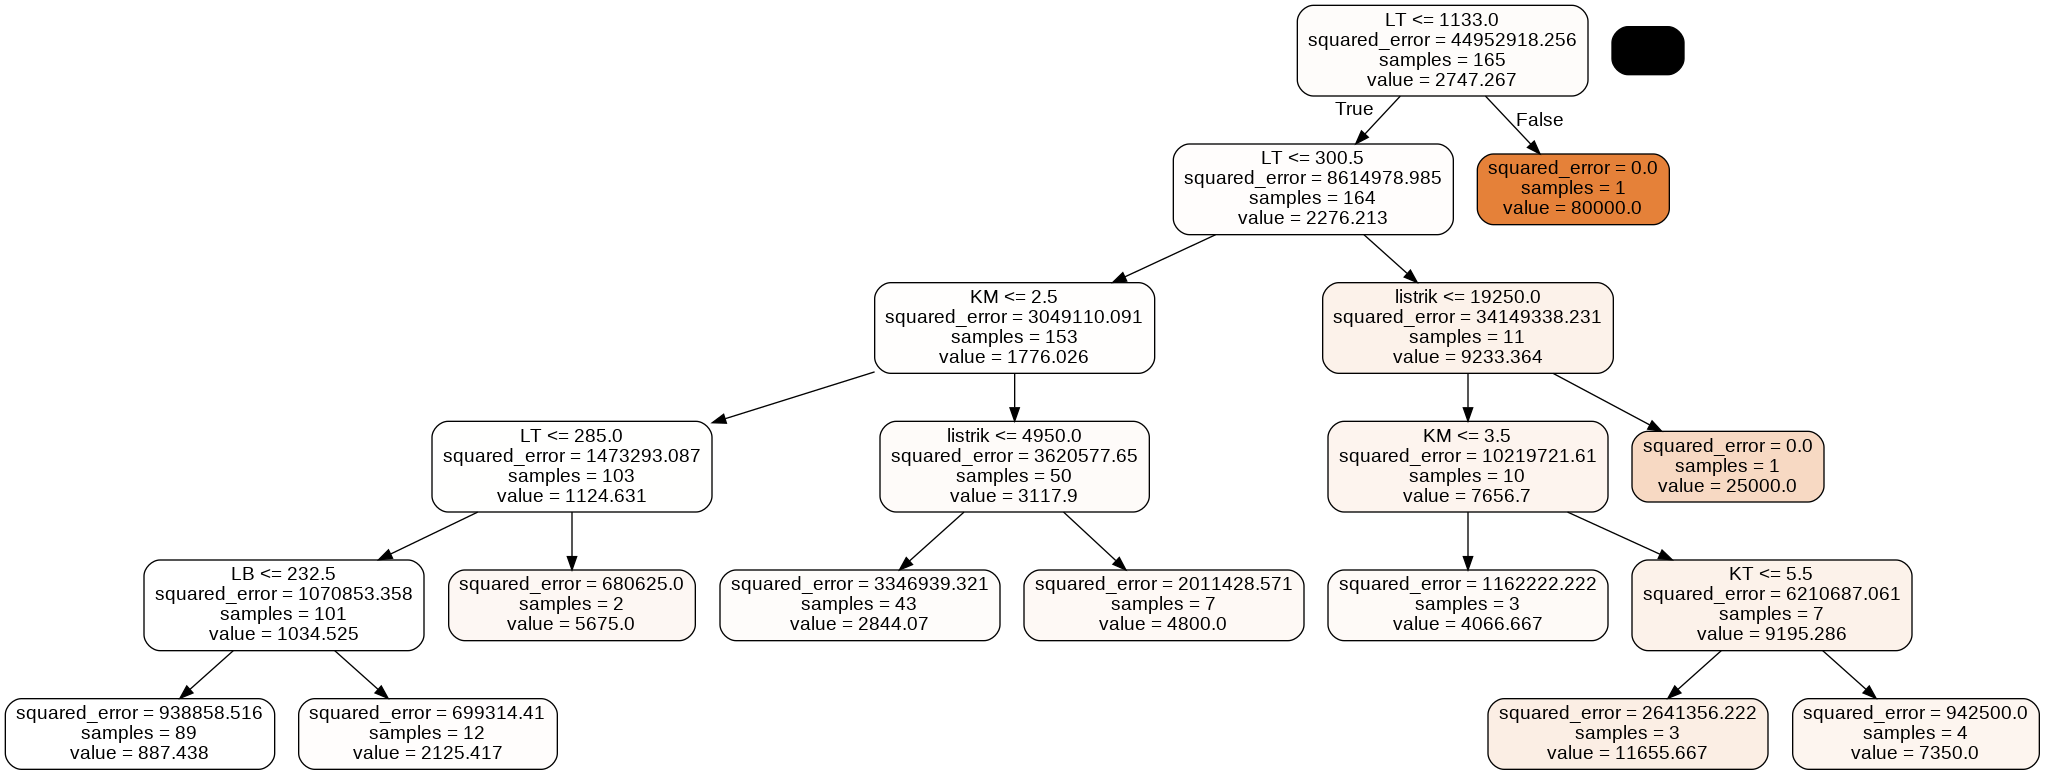

In [ ]:
dot_data=tree.export_graphviz(makassar_model1, out_file=None, feature_names = makassar_features1, class_names = val_predictions1, rounded = True, filled = True)
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())